Fruit Prices Data:
                        Fruit    Form  RetailPrice RetailPriceUnit  Yield  \
0                      Apples   Fresh       1.8541       per pound   0.90   
1          Apples, applesauce  Canned       1.1705       per pound   1.00   
2      Apples, ready-to-drink   Juice       0.8699        per pint   1.00   
3  Apples, frozen concentrate   Juice       0.6086        per pint   1.00   
4                    Apricots   Fresh       3.6162       per pound   0.93   

   CupEquivalentSize CupEquivalentUnit  CupEquivalentPrice  
0             0.2425            pounds              0.4996  
1             0.5401            pounds              0.6323  
2             8.0000      fluid ounces              0.4349  
3             8.0000      fluid ounces              0.3043  
4             0.3638            pounds              1.4145  

Vegetable Prices Data:
      Vegetable    Form  RetailPrice RetailPriceUnit   Yield  \
0  Acorn squash   Fresh       1.2136       per pound  0.4586   


<ipython-input-2-78d2686316c5>:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_fruit.index, y=avg_price_by_fruit.values, palette="viridis")


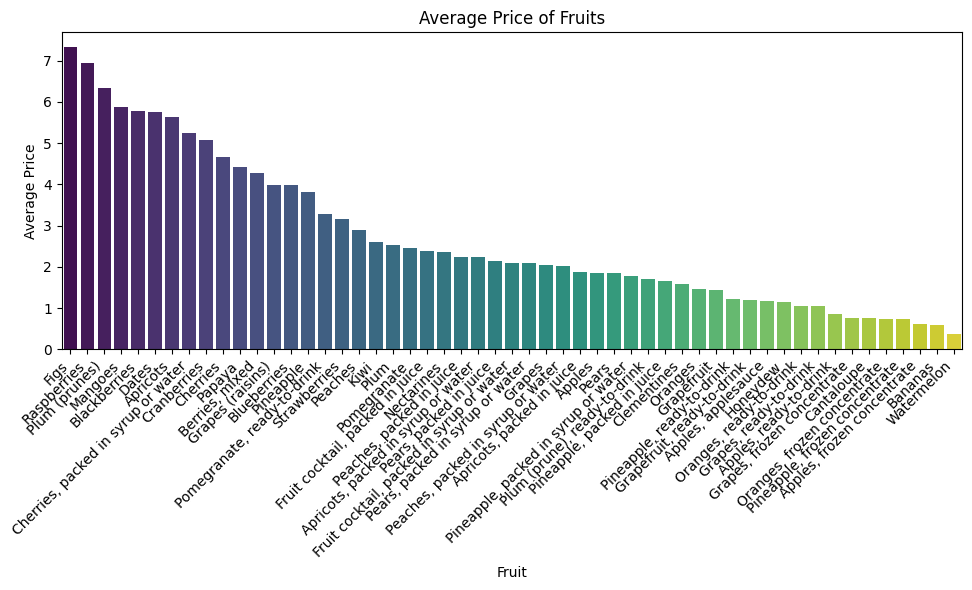

<ipython-input-2-78d2686316c5>:122: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_vegetable.index, y=avg_price_by_vegetable.values, palette="viridis")


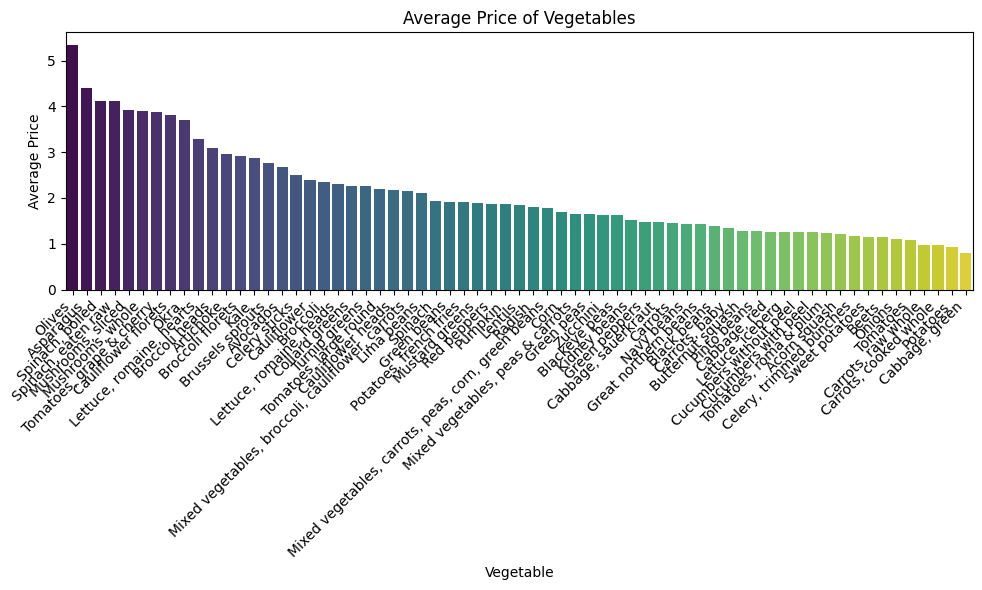

In [2]:
import pandas as pd
import sqlite3
import requests
import matplotlib.pyplot as plt
import seaborn as sns

# File paths for the price datasets
fruit_prices_file = "Fruit-Prices-2022.csv"
vegetable_prices_file = "Vegetable-Prices-2022.csv"

# Error handling for csv file reading
try:
    fruit_df = pd.read_csv(fruit_prices_file)
    vegetable_df = pd.read_csv(vegetable_prices_file)
except FileNotFoundError as e:
    print(f"Error: {e.strerror}. Please check if the file path is correct.")
    exit()

# Display basic info about the CSV datasets
print("Fruit Prices Data:")
print(fruit_df.head())
print("\nVegetable Prices Data:")
print(vegetable_df.head())

# Summary for the ingested CSV data
print("\nIngested Fruit Prices Data Summary:")
print(f"Number of Records: {fruit_df.shape[0]}")
print(f"Number of Columns: {fruit_df.shape[1]}")

print("\nIngested Vegetable Prices Data Summary:")
print(f"Number of Records: {vegetable_df.shape[0]}")
print(f"Number of Columns: {vegetable_df.shape[1]}")

# Process the Fruit Prices CSV Data
# Perform data analysis on fruit_df here
if 'RetailPrice' in fruit_df.columns:
    average_fruit_price = fruit_df.groupby("Fruit")["RetailPrice"].mean()
    print("\nAverage Price by Fruit:")
    print(average_fruit_price)

# Process the Vegetable Prices CSV Data
# Perform data analysis on vegetable_df here
if 'RetailPrice' in vegetable_df.columns:
    average_vegetable_price = vegetable_df.groupby("Vegetable")["RetailPrice"].mean()
    print("\nAverage Price by Vegetable:")
    print(average_vegetable_price)

# Quick Stats API setup for JSON data
API_KEY = "9BA3D61E-00AB-3F18-A28A-5CC5AC4E192C"  # put API key
API_URL = "https://quickstats.nass.usda.gov/api/api_GET/"
params = {
    "key": API_KEY,
    "commodity_desc": "APPLES",  # Use specific commodity
    "year": "2022",
    "source_desc": "SURVEY",  # Specify data source
    "sector_desc": "CROPS",  # specify sector
    "format": "JSON"
}

# Error handling for API request
try:
    response = requests.get(API_URL, params=params)
    if response.status_code == 200:
        api_data = response.json()
        if "data" in api_data:
            api_df = pd.DataFrame(api_data["data"])
            print("\nQuick Stats API Data:")
            print(api_df.head())
            # Perform analysis on API data here
            if 'RetailPrice' in api_df.columns:
                average_price_api = api_df.groupby("Commodity")["RetailPrice"].mean()
                print("\nAverage Price by Commodity (API Data):")
                print(average_price_api)
        else:
            print("API response is missing 'data' key.")
    else:
        print(f"Failed to retrieve data. Status code: {response.status_code}")
        print("Response text:", response.text)
except requests.exceptions.RequestException as e:
    print(f"An error occurred while retrieving data from the API: {e}")
    exit()

# Separately save the CSV data to SQLite database
conn = sqlite3.connect("agriculture_data.db")

# Save Fruit Prices Data to SQLite
fruit_df.to_sql("fruit_prices", conn, if_exists="replace", index=False)
print("Fruit data successfully saved to SQLite database.")

# Save Vegetable Prices Data to SQLite
vegetable_df.to_sql("vegetable_prices", conn, if_exists="replace", index=False)
print("Vegetable data successfully saved to SQLite database.")

# Save API Data to SQLite
if 'api_df' in locals():
    api_df.to_sql("api_data", conn, if_exists="replace", index=False)
    print("API data successfully saved to SQLite database.")

conn.close()

# Data Visualization for CSV Data, plotting average prices of different fruits/vegetables

plt.figure(figsize=(10, 6))

# Bar plot for average price by fruit
if 'Fruit' in fruit_df.columns and 'RetailPrice' in fruit_df.columns:
    avg_price_by_fruit = fruit_df.groupby("Fruit")["RetailPrice"].mean().sort_values(ascending=False)
    sns.barplot(x=avg_price_by_fruit.index, y=avg_price_by_fruit.values, palette="viridis")
    plt.title("Average Price of Fruits")
    plt.xlabel("Fruit")
    plt.ylabel("Average Price")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    # Show plot
    plt.show()

# Data Visualization for CSV Data Plotting the average prices of different vegetables
plt.figure(figsize=(10, 6))
if 'Vegetable' in vegetable_df.columns and 'RetailPrice' in vegetable_df.columns:
    avg_price_by_vegetable = vegetable_df.groupby("Vegetable")["RetailPrice"].mean().sort_values(ascending=False)
    sns.barplot(x=avg_price_by_vegetable.index, y=avg_price_by_vegetable.values, palette="viridis")
    plt.title("Average Price of Vegetables")
    plt.xlabel("Vegetable")
    plt.ylabel("Average Price")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    # Show plot
    plt.show()

# Data Visualization for API Data Plotting a scatter plot of price vs yield
if 'Yield' in api_df.columns and 'RetailPrice' in api_df.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=api_df, x="Yield", y="RetailPrice", hue="Commodity", palette="coolwarm", size="Yield", sizes=(50, 200), alpha=0.6)
    plt.title("Price vs Yield for Commodity Data (API)")
    plt.xlabel("Yield")
    plt.ylabel("Retail Price")
    plt.tight_layout()

    # Show plot
    plt.show()

